# Homework 2

### Due: Saturday Sep 18, at 11:59pm via Blackboard

A car dealership wants to understand their customers and their buying habbits. The data (`cardealership.csv`) represents a randsome sample of their sales. 

|**VARIABLE**|**DESCRIPTION**|
|------------|---------------|
| **Gender** | gender for customer |
| **marital status** | is the customer 'Married' or 'Single'? |
| **age** | age of the customer |
| **country** | country make of the car |
| **size** |  the size of the car they bought ('Small', 'Medium', 'Large') |
| **type** | the type of the car they bought ('Family', 'Sporty', 'work') |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


1. (1 point) Select all the married customers in the given dataset, and save it in a variable (`married_customers`). What is the percentage of married customers in the sample?

In [2]:
df = pd.read_csv('cardealership.csv')
married_customers = df[df['marital status']=='Married']
print(f'Percentage of Married Customers: {round(len(married_customers)/len(df)*100,2)}%')

Percentage of Married Customers: 64.69%


2. (1 point) Use a list comprehension to create a list with two age categories. The category is `Below or equal to 30` if `age <= 30`, otherwise the category is `Above 30`. Use the result from this question to compute the number of customers in each category.

In [3]:
age_category = ['Below or equal to 30' if i <= 30 else 'Above 30' for i in df['age']]
df['Age Category'] = age_category
df['Age Category'].value_counts()

Below or equal to 30    159
Above 30                144
Name: Age Category, dtype: int64

3. (2 points) The current version of `Pandas` has 142 methods including (`DataFrame()`, `Series()`, `value_counts()`, etc.). In this question, you are expected to learn about the `cut()` method which allows you to categorize a numerical vector into user-defined categories. [Click here](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) to learn more about the `cut` method.

    - Use the `cut()` method to categorize the `age` variable into three buckets: `(0,30]`, `(30, 34]`, and `(34,60]`. (For this exercise, you don't have to add the new column to the original dataframe. You can save it in a seperate variable instead)
    - Rename the labels of the buckets to the ones shown in the table below.  
    - How many element are there in each category? 



<center> 

|bucket | label |
|-------|-------|
|(0,30] | Below 30 | 
|(30, 34]| Between 30 and 34|
|(34,60]| Above 34|

<center>




In [4]:
df_age = pd.DataFrame()
df_age['Age'] = df.age
cut_labels = ['Below 30', 'Between 30 and 34', 'Above 34']
cut_bins = [0, 30, 34, 60]
df_age['age_cut'] = pd.cut(df_age['Age'], bins=cut_bins, labels=cut_labels)
df_age['age_cut'].value_counts()

Below 30             159
Above 34              76
Between 30 and 34     68
Name: age_cut, dtype: int64

4. (1 point) `Pandas` has another method called `qcut`, which allows you to categorize a numerical variable into equal-sized buckets based on quantiles. Use the `qcut()` method to categorize `age` into quartiles (4 buckets). [Click here](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to learn more about the `cut` method

In [5]:
df_age = pd.DataFrame()
df_age['Age'] = df.age
df_age['age_cut'] = pd.qcut(df_age['Age'],4)
print(df_age)
df_age['age_cut'].value_counts()

     Age         age_cut
0     34    (30.0, 34.5]
1     36    (34.5, 60.0]
2     23  (17.999, 26.0]
3     29    (26.0, 30.0]
4     39    (34.5, 60.0]
..   ...             ...
298   25  (17.999, 26.0]
299   31    (30.0, 34.5]
300   25  (17.999, 26.0]
301   32    (30.0, 34.5]
302   29    (26.0, 30.0]

[303 rows x 2 columns]


(17.999, 26.0]    85
(34.5, 60.0]      76
(26.0, 30.0]      74
(30.0, 34.5]      68
Name: age_cut, dtype: int64

5. (1 point) Using `pandas`, summarize the customer characteristics: `Gender`, `marital status` (using relative frequency tables) and `age` (using the `describe()` method). 

In [6]:
print('Gender Summary')
print(df.Gender.value_counts(normalize = True),'\n')

print('Marital Status Summary')
print(df['marital status'].value_counts(normalize = True),'\n')

print('Age Summary')
print(df['age'].describe(),'\n')

Gender Summary
Male      0.544554
Female    0.455446
Name: Gender, dtype: float64 

Marital Status Summary
Married    0.646865
Single     0.353135
Name: marital status, dtype: float64 

Age Summary
count    303.000000
mean      30.719472
std        5.984294
min       18.000000
25%       26.000000
50%       30.000000
75%       34.500000
max       60.000000
Name: age, dtype: float64 



6. (1 point) Using `pandas`, summarize the data on the cars sold: `country`, `size`, and `type` (using relative frequency tables).

In [8]:
print('Country Summary')
print(df.country.value_counts(normalize = True))

print('Size Summary')
print(df['size'].value_counts(normalize = True))

print('Type Summary')
print(df['type'].value_counts(normalize = True))

Country Summary
Japanese    0.488449
American    0.379538
European    0.132013
Name: country, dtype: float64
Size Summary
Small     0.452145
Medium    0.409241
Large     0.138614
Name: size, dtype: float64
Type Summary
Family    0.511551
Sporty    0.330033
Work      0.158416
Name: type, dtype: float64


7. (1 point) Write a summary paragraph describing the customers and cars sold data. Round all numbers in this paragraph to nearest integers.

Amongst the customers, there are slightly more male customers than females with males making up 54% of the total customers. 65% of the customers are married. The mean and median ages are almost similar at 30 years with a minimum and maximum of 18 and 60 respectively.

50% of the cars sold are Japanese while about 38% are American cars. European cars make up the rest of the cars sold. Small and medium cars make up a majority of cars with 45% and 41% of the share of cars sold with large cars making up the rest. Majority of the cars sold are family cars with a 51% share while sporty and work cars constitute the rest at 33% and 16% respectively.

8. (2 points) Create a bargraph that shows the distribution of car `type`. Your bargraph should be similar to the attached bargraph picture on blackboard ('CarsTypeDistribution.png'). In particular, make sure to:

- Use default matplotlib plot style
- Use % for the labels of the y-axis ticks
- Use `lightgrey` for the bars color
- Overlay a horizontal line (y=25). The line's style is "dashed", and the color is "blue"

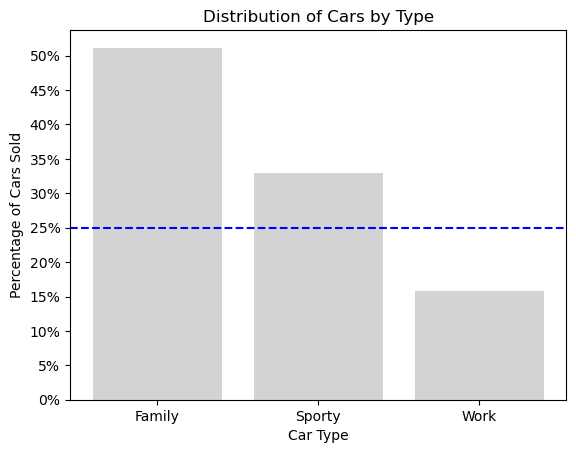

In [9]:
car_type = df['type'].value_counts(normalize = True)
plt.bar(car_type.index,car_type,color = 'lightgrey')
plt.xlabel('Car Type')
plt.ylabel('Percentage of Cars Sold')
plt.title('Distribution of Cars by Type')
plt.yticks(np.arange(0,0.55,0.05))
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.axhline(y = 0.25, color = 'b', linestyle = '--')
plt.show()